
# MultiIndexing

In [195]:
import pandas as pd
import matplotlib.pyplot as plt

In [109]:
carstocks = pd.read_csv('data/car_stocks.csv')

In [110]:
titanic = pd.read_csv('data/titanic.csv')
titanic['age'] = titanic['age'].replace(['?'], [None]).astype('float')
titanic['fare'] = titanic['fare'].replace(['?'], [None]).astype('float')

In [111]:
s1 = titanic.groupby('sex')['age'].mean()
s1

sex
female    28.687071
male      30.585233
Name: age, dtype: float64

In [112]:
s1.index

Index(['female', 'male'], dtype='object', name='sex')

In [156]:
df = titanic.groupby(['pclass', 'sex']).mean()

In [114]:
s2 = titanic.groupby(['pclass', 'sex'])['age'].mean().round(0)
s2

pclass  sex   
1       female    37.0
        male      41.0
2       female    27.0
        male      31.0
3       female    22.0
        male      26.0
Name: age, dtype: float64

In [115]:
s2.index

MultiIndex([(1, 'female'),
            (1,   'male'),
            (2, 'female'),
            (2,   'male'),
            (3, 'female'),
            (3,   'male')],
           names=['pclass', 'sex'])

In [116]:
titanic.groupby(['sex', 'age']).mean()

pclass  survived     sibsp     parch       fare
sex    age                                                       
female 0.1667   3.000000  1.000000  1.000000  2.000000  20.575000
       0.7500   3.000000  1.000000  2.000000  1.000000  19.258300
       0.9167   2.000000  1.000000  1.000000  2.000000  27.750000
       1.0000   2.800000  0.800000  0.800000  1.400000  19.467500
       2.0000   2.571429  0.285714  1.428571  1.428571  39.955357
...                  ...       ...       ...       ...        ...
male   70.0000  1.500000  0.000000  0.500000  0.500000  40.750000
       70.5000  3.000000  0.000000  0.000000  0.000000   7.750000
       71.0000  1.000000  0.000000  0.000000  0.000000  42.079200
       74.0000  3.000000  0.000000  0.000000  0.000000   7.775000
       80.0000  1.000000  1.000000  0.000000  0.000000  30.000000

[166 rows x 5 columns]

In [117]:
pops = pd.read_csv('data/state_pops.csv')
pops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   state       1272 non-null   object 
 1   year        1272 non-null   int64  
 2   population  1262 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 29.9+ KB


In [118]:
pops.set_index('state')

,year,population
state,,
AL,2012,4817528.0
AL,2010,4785570.0
AL,2011,4801627.0
AL,2009,4757938.0
AL,2013,4833722.0
...,...,...
USA,2013,316128839.0
USA,2009,306771529.0
USA,2010,309326295.0


In [119]:
pops.set_index(['state', 'year'], inplace=True)

In [120]:
pops

population
state year             
AL    2012    4817528.0
      2010    4785570.0
      2011    4801627.0
      2009    4757938.0
      2013    4833722.0
...                 ...
USA   2013  316128839.0
      2009  306771529.0
      2010  309326295.0
      2011  311582564.0
      2012  313873685.0

[1272 rows x 1 columns]

# Sort MultiIndex

In [121]:
pops.sort_index()

population
state year            
AK    1990    553290.0
      1991    570193.0
      1992    588736.0
      1993    599434.0
      1994    603308.0
...                ...
WY    2009    559851.0
      2010    564222.0
      2011    567329.0
      2012    576626.0
      2013    582658.0

[1272 rows x 1 columns]

In [122]:
pops.sort_index(level=1)

,,population
state,year,
AK,1990,553290.0
AL,1990,4050055.0
AR,1990,2356586.0
AZ,1990,3684097.0
CA,1990,29959515.0
...,...,...
VT,2013,626630.0
WA,2013,6971406.0
WI,2013,5742713.0


In [123]:
pops.sort_index(ascending=[False, True], inplace=True)

# Sorting MultiIndexes Using Loc

In [124]:
pops.loc[('WY', 1992)]

population    466251.0
Name: (WY, 1992), dtype: float64

In [125]:
pops.sort_index(inplace=True)

In [126]:
pops.loc[('AK', 2011): ('AL', 1993)]

population
state year            
AK    2011    723375.0
      2012    730307.0
      2013    735132.0
AL    1990   4050055.0
      1991   4099156.0
      1992   4154014.0
      1993   4214202.0

In [129]:
pops.loc[:,[1991],:]

,,population
state,year,
AK,1991,570193.0
AL,1991,4099156.0
AR,1991,2383144.0
AZ,1991,3788576.0
CA,1991,30470736.0
CO,1991,3387119.0
CT,1991,3302895.0
DC,1991,600870.0
DE,1991,683080.0


In [130]:
pops.xs(2013, level='year')

,population
state,
AK,735132.0
AL,4833722.0
AR,2959373.0
AZ,6626624.0
CA,38332521.0
CO,5268367.0
CT,3596080.0
DC,646449.0
DE,925749.0


In [135]:
pops.xs(2013, level=1).mean()


population    1.199760e+07
dtype: float64

In [136]:
pops.index

MultiIndex([('AK', 1990),
            ('AK', 1991),
            ('AK', 1992),
            ('AK', 1993),
            ('AK', 1994),
            ('AK', 1995),
            ('AK', 1996),
            ('AK', 1997),
            ('AK', 1998),
            ('AK', 1999),
            ...
            ('WY', 2004),
            ('WY', 2005),
            ('WY', 2006),
            ('WY', 2007),
            ('WY', 2008),
            ('WY', 2009),
            ('WY', 2010),
            ('WY', 2011),
            ('WY', 2012),
            ('WY', 2013)],
           names=['state', 'year'], length=1272)

In [137]:
pops.index.levels

FrozenList([['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'USA', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]])

In [138]:
pops.index.get_level_values(0)

Index(['AK', 'AK', 'AK', 'AK', 'AK', 'AK', 'AK', 'AK', 'AK', 'AK',
       ...
       'WY', 'WY', 'WY', 'WY', 'WY', 'WY', 'WY', 'WY', 'WY', 'WY'],
      dtype='object', name='state', length=1272)

In [139]:
pops.index.get_level_values(1)

Int64Index([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
            ...
            2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013],
           dtype='int64', name='year', length=1272)

In [143]:
even_years = [year % 2 == 0 for year in pops.index.get_level_values(1)]

array([ True, False,  True, ..., False,  True, False])

In [144]:
pops.loc[even_years]

population
state year            
AK    1990    553290.0
      1992    588736.0
      1994    603308.0
      1996    608569.0
      1998    619933.0
...                ...
WY    2004    509106.0
      2006    522667.0
      2008    546043.0
      2010    564222.0
      2012    576626.0

[636 rows x 1 columns]

In [151]:
ends_with_a = pops.index.get_level_values(0).str[1] == 'A'

In [154]:
pops[ends_with_a]

population
state year            
CA    1990  29959515.0
      1991  30470736.0
      1992  30974659.0
      1993  31274928.0
      1994  31484435.0
...                ...
WA    2009   6667426.0
      2010   6742256.0
      2011   6821481.0
      2012   6895318.0
      2013   6971406.0

[192 rows x 1 columns]

In [157]:
df

survived        age     sibsp     parch        fare
pclass sex                                                        
1      female  0.965278  37.037594  0.555556  0.472222  109.412385
       male    0.340782  41.029250  0.340782  0.279330   69.888385
2      female  0.886792  27.499191  0.500000  0.650943   23.234827
       male    0.146199  30.815401  0.327485  0.192982   19.904946
3      female  0.490741  22.185307  0.791667  0.731481   15.324250
       male    0.152130  25.962273  0.470588  0.255578   12.415462

In [158]:
df.loc[(2, 'male')]

survived     0.146199
age         30.815401
sibsp        0.327485
parch        0.192982
fare        19.904946
Name: (2, male), dtype: float64

In [160]:
df.loc[(2, 'male')]['age'].round(2)

30.82

In [166]:
new_df = titanic.groupby('sex').agg({
    'age': ['min', 'max', 'mean'],
    'fare': ['min', 'max', 'mean'],
    'survived': ['mean']
}).round(2)

In [167]:
new_df

age               fare                survived
         min   max   mean   min     max   mean     mean
sex                                                    
female  0.17  76.0  28.69  6.75  512.33  46.20     0.73
male    0.33  80.0  30.59  0.00  512.33  26.15     0.19

In [169]:
new_df.index

Index(['female', 'male'], dtype='object', name='sex')

In [170]:
new_df.columns

MultiIndex([(     'age',  'min'),
            (     'age',  'max'),
            (     'age', 'mean'),
            (    'fare',  'min'),
            (    'fare',  'max'),
            (    'fare', 'mean'),
            ('survived', 'mean')],
           )

In [172]:
new_df[('age', 'mean')]

sex
female    28.69
male      30.59
Name: (age, mean), dtype: float64

In [173]:
pops

population
state year            
AK    1990    553290.0
      1991    570193.0
      1992    588736.0
      1993    599434.0
      1994    603308.0
...                ...
WY    2009    559851.0
      2010    564222.0
      2011    567329.0
      2012    576626.0
      2013    582658.0

[1272 rows x 1 columns]

In [176]:
pops.unstack()

population                                                      \
year          1990         1991         1992         1993         1994   
state                                                                    
AK        553290.0     570193.0     588736.0     599434.0     603308.0   
AL       4050055.0    4099156.0    4154014.0    4214202.0    4260229.0   
AR       2356586.0    2383144.0    2415984.0    2456303.0    2494019.0   
AZ       3684097.0    3788576.0    3915740.0    4065440.0    4245089.0   
CA      29959515.0   30470736.0   30974659.0   31274928.0   31484435.0   
CO       3307618.0    3387119.0    3495939.0    3613734.0    3724168.0   
CT       3291967.0    3302895.0    3300712.0    3309175.0    3316121.0   
DC        605321.0     600870.0     597567.0     595302.0     589240.0   
DE        669567.0     683080.0     694927.0     706378.0     717545.0   
FL      13033307.0   13369798.0   13650553.0   13927185.0   14239444.0   
GA       6512602.0    6653005.0    6817203.0    6978240.0    7157165.0   
HI       1113491.0    1136754.0    1158613.0    1172838.0    1187536.0   
IA       2781018.0    2797613.0    2818401.0    2836972.0    2850746.0   
ID       1012384.0    1041316.0    1071685.0    1108768.0    1145140.0   
IL      11453316.0   11568964.0   11694184.0   11809579.0   11912585.0   
IN       5557798.0    5616388.0    5674547.0    5739019.0    5793526.0   
KS       2481349.0    2498722.0    2532395.0    2556547.0    2580513.0   
KY       3694048.0    3722328.0    3765469.0    3812206.0    3849088.0   
LA       4221532.0    4253279.0    4293003.0    4316428.0    4347481.0   
MA       6022639.0    6018470.0    6028709.0    6060569.0    6095241.0   
MD       4799770.0    4867641.0    4923369.0    4971889.0    5023060.0   
ME       1231719.0    1237081.0    1238508.0    1242302.0    1242662.0   
MI       9311319.0    9400446.0    9479065.0    9540114.0    9597737.0   
MN       4389857.0    4440859.0    4495572.0    4555956.0    4610355.0   
MO       5128880.0    5170800.0    5217101.0    5271175.0    5324497.0   
MS       2578897.0    2598733.0    2623734.0    2655100.0    2688992.0   
MT        800204.0     809680.0     825770.0     844761.0     861306.0   
NC       6664016.0    6784280.0    6897214.0    7042818.0    7187398.0   
ND        637685.0     635753.0     638223.0     641216.0     644806.0   
NE       1581660.0    1595919.0    1611687.0    1625590.0    1639041.0   
NH       1112384.0    1109929.0    1117785.0    1129458.0    1142561.0   
NJ       7762963.0    7814676.0    7880508.0    7948915.0    8014306.0   
NM       1521574.0    1555305.0    1595442.0    1636453.0    1682398.0   
NV       1220695.0    1296172.0    1351367.0    1411215.0    1499298.0   
NY      18020784.0   18122510.0   18246653.0   18374954.0   18459470.0   
OH      10864162.0   10945762.0   11029431.0   11101140.0   11152455.0   
OK       3148825.0    3175440.0    3220517.0    3252285.0    3280940.0   
OR       2860375.0    2928507.0    2991755.0    3060367.0    3121264.0   
PA      11903299.0   11982164.0   12049450.0   12119724.0   12166050.0   
PR             NaN          NaN          NaN          NaN          NaN   
RI       1005995.0    1010649.0    1012581.0    1015113.0    1015960.0   
SC       3501155.0    3570404.0    3620464.0    3663314.0    3705397.0   
SD        697101.0     703669.0     712801.0     722160.0     730790.0   
TN       4894492.0    4966587.0    5049742.0    5137584.0    5231438.0   
TX      17056755.0   17398005.0   17759738.0   18161612.0   18564062.0   
USA    249622814.0  252980942.0  256514231.0  259918595.0  263125826.0   
UT       1731223.0    1779780.0    1836799.0    1898404.0    1960446.0   
VA       6216884.0    6301217.0    6414307.0    6509630.0    6593139.0   
VT        564798.0     568606.0     572751.0     577748.0     583836.0   
WA       4903043.0    5025624.0    5160757.0    5278842.0    5375161.0   
WI       4904562.0    4964343.0    5025398.0    5084889.0    5133678.0   
WV       179

In [180]:
unstack_df = pops.unstack(level=0)
unstack_df

population                                                          \
state         AK         AL         AR         AZ          CA         CO   
year                                                                       
1990    553290.0  4050055.0  2356586.0  3684097.0  29959515.0  3307618.0   
1991    570193.0  4099156.0  2383144.0  3788576.0  30470736.0  3387119.0   
1992    588736.0  4154014.0  2415984.0  3915740.0  30974659.0  3495939.0   
1993    599434.0  4214202.0  2456303.0  4065440.0  31274928.0  3613734.0   
1994    603308.0  4260229.0  2494019.0  4245089.0  31484435.0  3724168.0   
1995    604412.0  4296800.0  2535399.0  4432499.0  31696582.0  3826653.0   
1996    608569.0  4331103.0  2572109.0  4586940.0  32018834.0  3919972.0   
1997    612968.0  4367935.0  2601091.0  4736990.0  32486010.0  4018293.0   
1998    619933.0  4404701.0  2626289.0  4883342.0  32987675.0  4116639.0   
1999    624779.0  4430141.0  2651860.0  5023823.0  33499204.0  4226018.0   
2000    627963.0  4452173.0  2678588.0  5160586.0  33987977.0  4326921.0   
2001    633714.0  4467634.0  2691571.0  5273477.0  34479458.0  4425687.0   
2002    642337.0  4480089.0  2705927.0  5396255.0  34871843.0  4490406.0   
2003    648414.0  4503491.0  2724816.0  5510364.0  35253159.0  4528732.0   
2004    659286.0  4530729.0  2749686.0  5652404.0  35574576.0  4575013.0   
2005    666946.0  4569805.0  2781097.0  5839077.0  35827943.0  4631888.0   
2006    675302.0  4628981.0  2821761.0  6029141.0  36021202.0  4720423.0   
2007    680300.0  4672840.0  2848650.0  6167681.0  36250311.0  4803868.0   
2008    687455.0  4718206.0  2874554.0  6280362.0  36604337.0  4889730.0   
2009    698895.0  4757938.0  2896843.0  6343154.0  36961229.0  4972195.0   
2010    713868.0  4785570.0  2922280.0  6408790.0  37333601.0  5048196.0   
2011    723375.0  4801627.0  2938506.0  6468796.0  37668681.0  5118400.0   
2012    730307.0  4817528.0  2949828.0  6551149.0  37999878.0  5189458.0   
2013    735132.0  4833722.0  2959373.0  6626624.0  38332521.0  5268367.0   

                                                  ...                         \
state         CT        DC        DE          FL  ...         TN          TX   
year                                              ...                          
1990   3291967.0  605321.0  669567.0  13033307.0  ...  4894492.0  17056755.0   
1991   3302895.0  600870.0  683080.0  13369798.0  ...  4966587.0  17398005.0   
1992   3300712.0  597567.0  694927.0  13650553.0  ...  5049742.0  17759738.0   
1993   3309175.0  595302.0  706378.0  13927185.0  ...  5137584.0  18161612.0   
1994   3316121.0  589240.0  717545.0  14239444.0  ...  5231438.0  18564062.0   
1995   3324144.0  580519.0  729735.0  14537875.0  ...  5326936.0  18958751.0   
1996   3336685.0  572379.0  740978.0  14853360.0  ...  5416643.0  19340342.0   
1997   3349348.0  567739.0  751487.0  15186304.0  ...  5499233.0  19740317.0   
1998   3365352.0  565232.0  763335.0  15486559.0  ...  5570045.0  20157531.0   
1999   3386401.0  570220.0  774990.0  15759421.0  ...  5638706.0  20558220.0   
2000   3411777.0  572046.0  786373.0  16047515.0  ...  5703719.0  20944499.0   
2001   3432835.0  574504.0  795699.0  16356966.0  ...  5750789.0  21319622.0   
2002   3458749.0  573158.0  806169.0  16689370.0  ...  5795918.0  21690325.0   
2003   3484336.0  568502.0  818003.0  17004085.0  ...  5847812.0  22030931.0   
2004   3496094.0  567754.0  830803.0  17415318.0  ...  5910809.0  22394023.0   
2005   3506956.0  567136.0  845150.0  17842038.0  ...  5991057.0  22778123.0   
2006   3517460.0  570681.0  859268.0  18166990.0  ...  6088766.0  23359580.0   
2007   3527270.0  574404.0  871749.0  18367842.0  ...  6175727.0  23831983.0   
2008   3545579.0  580236.0  883874.0  18527305.0  ...  6247411.0  24309039.0   
2009   3561807.0  592228.0  891730.0  18652644.0  ...  6306019.0  24801761.0   
2010   3579210.0  605125.0  899711.0  18846054.0  ...  6356683.0  25245178.0   
2011   3588948.0  619624.0  90798

In [187]:
unstack_df.stack()

population
year state            
1990 AK       553290.0
     AL      4050055.0
     AR      2356586.0
     AZ      3684097.0
     CA     29959515.0
...                ...
2013 VT       626630.0
     WA      6971406.0
     WI      5742713.0
     WV      1854304.0
     WY       582658.0

[1262 rows x 1 columns]

In [188]:
titanic.groupby(['pclass', 'sex'])['age'].mean()

pclass  sex   
1       female    37.037594
        male      41.029250
2       female    27.499191
        male      30.815401
3       female    22.185307
        male      25.962273
Name: age, dtype: float64

<AxesSubplot:ylabel='pclass,sex'>

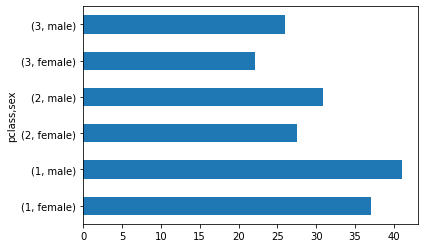

In [192]:
titanic.groupby(['pclass', 'sex'])['age'].mean().plot.barh()

In [193]:
titanic.groupby(['pclass', 'sex'])['age'].mean().unstack()

sex,female,male
pclass,,
1,37.037594,41.029250
2,27.499191,30.815401
3,22.185307,25.962273


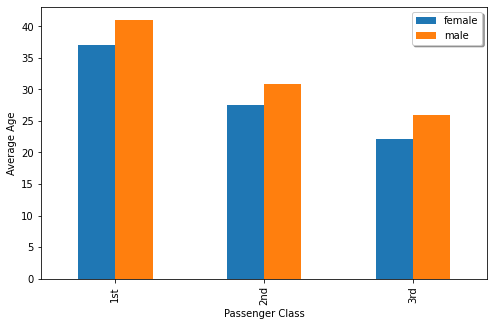

In [207]:
titanic.groupby(['pclass', 'sex'])['age'].mean().unstack().plot.bar(figsize=(8,5), ylabel='Average Age', xlabel='Passenger Class')
plt.xticks([0,1,2], ['1st', '2nd', '3rd'])
plt.legend(shadow=True)

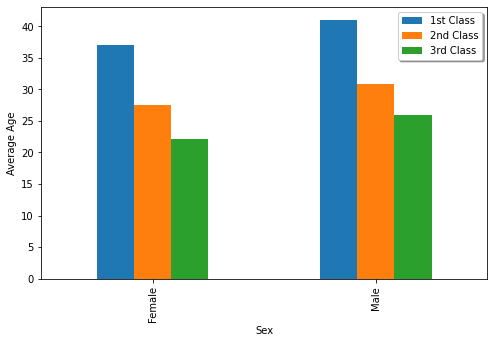

In [212]:
titanic.groupby(['pclass', 'sex'])['age'].mean().unstack(level='pclass').plot.bar(figsize=(8,5), ylabel='Average Age', xlabel='Sex')
plt.xticks([0,1], ['Female', 'Male'])
plt.legend(shadow=True, labels=['1st Class', '2nd Class', '3rd Class'])

<AxesSubplot:xlabel='sex,survived'>

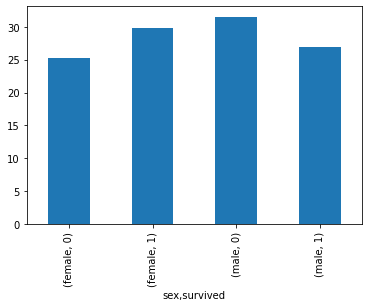

In [216]:
titanic.groupby(['sex', 'survived'])['age'].mean().plot.bar()

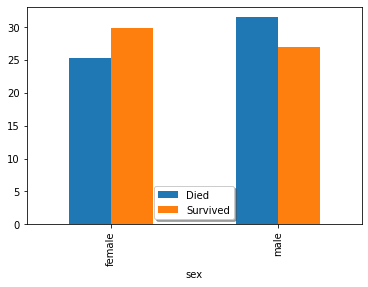

In [228]:
titanic.groupby(['sex', 'survived'])['age'].mean().unstack().plot(kind='bar')
plt.legend(shadow=True, labels=['Died', 'Survived'])
plt.show()

In [231]:
pops.groupby('year').sum()

,population
year,
1990,499245628.0
1991,505961884.0
1992,513028462.0
1993,519837190.0
1994,526251652.0
1995,532556806.0
1996,538788582.0
1997,545293864.0
1998,551708232.0


In [230]:
pops.groupby('state').min()

,population
state,
AK,553290.0
AL,4050055.0
AR,2356586.0
AZ,3684097.0
CA,29959515.0
CO,3307618.0
CT,3291967.0
DC,565232.0
DE,669567.0
